In [28]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
f = r'C:\Users\jflan\Downloads\Employment_Wages_in_Colorado.csv'


In [29]:
import matplotlib.pyplot as plt

In [30]:
df= pandas.read_csv(f)
print(len(df))

83407


In [31]:
print(df.keys())
print(len(df.keys()))

Index(['stateabbrv', 'statename', 'stfips', 'areaname', 'areatype',
       'areatyname', 'area', 'periodyear', 'periodtype', 'pertypdesc',
       'period', 'indcodty', 'indcode', 'indcodetitle', 'occodetype',
       'occodetydesc', 'occcode', 'codetitle', 'wagesource', 'wagesrdesc',
       'ratetype', 'ratetydesc', 'empcount', 'response', 'mean', 'entrywg',
       'experience', 'pct10', 'pct25', 'median', 'pct75', 'pct90', 'udpct',
       'udpctwage', 'udrnglopct', 'udrnghipct', 'udrngmean', 'wpctrelerr',
       'epctrelerr', 'panelcode'],
      dtype='object')
40


In [32]:
first_value=df.head(1)
print(first_value.transpose())

                                                      0
stateabbrv                                           CO
statename                                      Colorado
stfips                                                8
areaname                                       Colorado
areatype                                              1
areatyname                                        State
area                                                  0
periodyear                                         2010
periodtype                                            1
pertypdesc                                       Annual
period                                                0
indcodty                                             10
indcode                                               0
indcodetitle                                  Total All
occodetype                                            8
occodetydesc                                   SOC 2000
occcode                                         

In [33]:
print(df['ratetype'].unique())
print(df['ratetype'])

[1 4]
0        1
1        4
2        1
3        4
4        1
5        4
6        1
7        4
8        1
9        4
10       1
11       4
12       1
13       4
14       1
15       4
16       1
17       4
18       1
19       4
20       1
21       4
22       1
23       4
24       1
25       4
26       1
27       4
28       1
29       4
        ..
83377    1
83378    4
83379    1
83380    4
83381    1
83382    4
83383    1
83384    4
83385    1
83386    4
83387    1
83388    4
83389    1
83390    4
83391    1
83392    4
83393    1
83394    4
83395    1
83396    4
83397    1
83398    4
83399    1
83400    4
83401    1
83402    4
83403    1
83404    4
83405    1
83406    4
Name: ratetype, Length: 83407, dtype: int64


In [34]:
print(df['codetitle'])

0                     Total All occupations
1                     Total All occupations
2                     Total All occupations
3                     Total All occupations
4                     Total All occupations
5                     Total All occupations
6                     Total All occupations
7                     Total All occupations
8                     Total All occupations
9                     Total All occupations
10                    Total All occupations
11                    Total All occupations
12                    Total All occupations
13                    Total All occupations
14                    Total All occupations
15                    Total All occupations
16                    Total All occupations
17                    Total All occupations
18                    Total All occupations
19                    Total All occupations
20                    Total All occupations
21                    Total All occupations
22                    Total All 

In [35]:
#Data cleaning

#Let's see if we can find which columns contain blanks and which ones are filled out completely
df.isna().any()

stateabbrv      False
statename       False
stfips          False
areaname        False
areatype        False
areatyname      False
area            False
periodyear      False
periodtype      False
pertypdesc      False
period          False
indcodty        False
indcode         False
indcodetitle    False
occodetype      False
occodetydesc    False
occcode         False
codetitle       False
wagesource      False
wagesrdesc      False
ratetype        False
ratetydesc      False
empcount        False
response        False
mean             True
entrywg          True
experience       True
pct10            True
pct25            True
median           True
pct75            True
pct90            True
udpct            True
udpctwage        True
udrnglopct       True
udrnghipct       True
udrngmean        True
wpctrelerr       True
epctrelerr      False
panelcode        True
dtype: bool

In [36]:
#Of the columns that contain blanks what percentage of those columns are blank
for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values, {2} percent is missing.'.format(column, df[column].isnull().sum(), str(round(100*df[column].isnull().sum()/83408))))

mean has 1742 null values, 2.0 percent is missing.
entrywg has 1912 null values, 2.0 percent is missing.
experience has 1974 null values, 2.0 percent is missing.
pct10 has 1762 null values, 2.0 percent is missing.
pct25 has 1852 null values, 2.0 percent is missing.
median has 2083 null values, 2.0 percent is missing.
pct75 has 11082 null values, 13.0 percent is missing.
pct90 has 11958 null values, 14.0 percent is missing.
udpct has 56179 null values, 67.0 percent is missing.
udpctwage has 74887 null values, 90.0 percent is missing.
udrnglopct has 56179 null values, 67.0 percent is missing.
udrnghipct has 56179 null values, 67.0 percent is missing.
udrngmean has 74887 null values, 90.0 percent is missing.
wpctrelerr has 9091 null values, 11.0 percent is missing.
panelcode has 35651 null values, 43.0 percent is missing.


In [37]:
duplicates= df[df.duplicated()]
print(len(duplicates))
# no duplicate rows! However, we still have summary rows. Let's remove all rows that are of a summary and see if that removes some holes in the data
print(df['areatyname'].unique())

0
['State' 'Metropolitan Statistical Area' 'Balance of State (pre-2015)'
 'Balance of State']


In [38]:
#we want to remove anything that isn't a metropolitan statistical area
df= df.loc[df['areatyname']== 'Metropolitan Statistical Area']
print(len(df))
for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values, {2} percent is missing.'.format(column, df[column].isnull().sum(), str(round(100*df[column].isnull().sum()/83408))))

50612
mean has 1013 null values, 1.0 percent is missing.
entrywg has 1121 null values, 1.0 percent is missing.
experience has 1155 null values, 1.0 percent is missing.
pct10 has 1029 null values, 1.0 percent is missing.
pct25 has 1089 null values, 1.0 percent is missing.
median has 1220 null values, 1.0 percent is missing.
pct75 has 6522 null values, 8.0 percent is missing.
pct90 has 7121 null values, 9.0 percent is missing.
udpct has 33539 null values, 40.0 percent is missing.
udpctwage has 45191 null values, 54.0 percent is missing.
udrnglopct has 33539 null values, 40.0 percent is missing.
udrnghipct has 33539 null values, 40.0 percent is missing.
udrngmean has 45191 null values, 54.0 percent is missing.
wpctrelerr has 5453 null values, 7.0 percent is missing.
panelcode has 21720 null values, 26.0 percent is missing.


In [39]:
#We should also look at the wage type so we are being specific to annual salaries
#let's look at the unique wage rates, and change it to be uniformly annual wage
print(df['ratetydesc'].unique())
#How is the data split?
print(len(df.loc[df['ratetydesc']=='Hourly wage']))
print(len(df.loc[df['ratetydesc']=='Annual wage or salary']))
df=df.loc[df['ratetydesc']=='Annual wage or salary']


['Hourly wage' 'Annual wage or salary']
25146
25466


In [40]:
#Let's drop all data that isn't annual
df=df.loc[df['ratetydesc']=='Annual wage or salary']
#How has it changed null values
for column in df:
        if df[column].isnull().any():
            print('{0} has {1} null values, {2} percent is missing.'.format(column, df[column].isnull().sum(), str(round(100*df[column].isnull().sum()/83408))))

mean has 50 null values, 0.0 percent is missing.
entrywg has 104 null values, 0.0 percent is missing.
experience has 121 null values, 0.0 percent is missing.
pct10 has 58 null values, 0.0 percent is missing.
pct25 has 88 null values, 0.0 percent is missing.
median has 154 null values, 0.0 percent is missing.
pct75 has 2860 null values, 3.0 percent is missing.
pct90 has 3167 null values, 4.0 percent is missing.
udpct has 16883 null values, 20.0 percent is missing.
udpctwage has 22709 null values, 27.0 percent is missing.
udrnglopct has 16883 null values, 20.0 percent is missing.
udrnghipct has 16883 null values, 20.0 percent is missing.
udrngmean has 22709 null values, 27.0 percent is missing.
wpctrelerr has 2781 null values, 3.0 percent is missing.
panelcode has 11020 null values, 13.0 percent is missing.


53736.75306893296


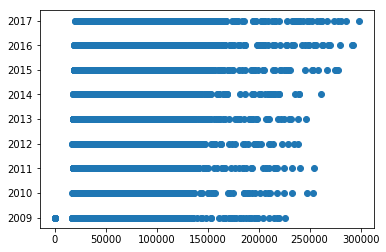

In [41]:
#There is a significant decrease in null values. Next let's search for outliers in the mean column.
#Based on Occupation is there anything job that seems to be way high or perhaps much lower than is realistic
#How many unique occupations do we have?
#print(len(df['codetitle'].unique()))
#859! that's a lot I'm sure there will be some outliers. First let's find the mean of the mean
print(df['mean'].mean())
#ok, now lets do a scatter plot to see if there are any extreme values
plt.scatter(df['mean'],df['periodyear'])

In [42]:
#Looks like there is a few missing values. We can address those later
#validate the redunancies
print(len(df['codetitle'].unique()))

859


C:\Users\jflan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


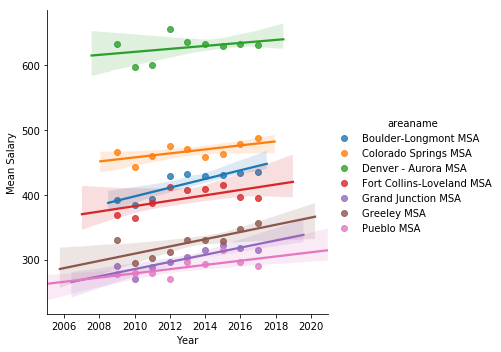

In [69]:
msadfdf=df.groupby(['periodyear','areaname'])[['mean']].count().reset_index();
#let's do a simple regression analysis on time vs mean revenue
mean1=sns.lmplot(x='periodyear',y='mean',data=msadfdf,hue='areaname')
mean1=(mean1.set_axis_labels("Year","Mean Salary"))
